# Homework 6

In [8]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline
from astropy import units as u
import astropy.constants as con
import pandas as pd
import math

This homework is all about useful external libraries that are most common to use in astronomy research. The two most important libraries apart from scipy, numpy, and matplotlib are **astropy** and **pandas**. We explore the basics of these super versatile libraries. 

# Astropy (50 Points)

## CRAZY UNIT CONVERSION!!! (20 Points)

As you take more astronomy classes, you will face more and more unit conversion problems - they are annoying. That's why astropy.units is very helpful. Let's do some practices here.

The documentations for astropy.units and astropy.constants will very helpful to you.

astropy.units documentation: https://docs.astropy.org/en/stable/units/

astropy.constants documentation: https://docs.astropy.org/en/stable/constants/

NOTE: In this problem, you MUST use astropy.constants when doing calculations involving fundamental constants. Also, you cannot look up values such as solar mass, earth mass, etc. Use the two packages solely.

### Problem 1) Speed of light (5 Points)

What is the speed of light ($c$) in $pc/yr$?

In [9]:
c = (con.c).to(u.pc/u.year) 

print (c)


0.3066013937879528 pc / yr


### Problem 2) Newton's 2nd Law (5 Points)

Recall that NII states 
$$F =ma\,\,.$$
Say a force of $97650134N$ is exerted on an object having a mass of $0.0071$ earth mass. What is the acceleration of the object in $AU/days^2$?

In [10]:
F = 97650134*u.N
m = .0071*u.Mearth
a = F/m
a.to(u.AU/u.d**2)

<Quantity 1.14917074e-16 AU / d2>

### Problem 3) Newton's Universal Law of Gravitation (10 Points)

Recall that the gravitational acceleration due to an object with mass $m$ at a distance $r$ is given by 
$$a_g = \frac{Gm}{r^2}\,\,.$$
What is the gravitational acceleration due to a planet of $3.1415926$ Jupiter-mass at a distance of $1.523AU$? Give your answer in $pc/yr^2$.

In [11]:
G = con.G
print(G)
m = 3.1415926 * u.M_jup
r = 1.523*u.AU
acc = (G*m)/r**2
acc.to(u.pc/u.yr**2)

  Name   = Gravitational constant
  Value  = 6.6743e-11
  Uncertainty  = 1.5e-15
  Unit  = m3 / (kg s2)
  Reference = CODATA 2018


<Quantity 2.47449776e-07 pc / yr2>

## Visualising Coordinate Transformation (30 Points)

We introduced coordinate transformation using astropy, but maybe that was too abstract to you, so let's use this problem as a way for you to visualise this process. Each part will be worth **5 Points**

There are several things you need to do:
1. Open up the FITS file named 'clusters.fits' (this part of the code is written for you already)


2. Read it as a table using astropy.table (you will have to import the packages you need and write your own code from hereafter)


3. Plot the positions of all the objects in the table, COLOUR-CODED by their types (there is a column named 'CLASS'), with RA on the x-axis and DEC on the y-axis. You should see a curved trend with a huge dip in the middle.


4. Carry out a coordinate transformation from the ICRS coordinates to the galactic coordinates - there is a column named "DISTANCE" which you will need. 


5. Now plot the position of all the objects in the galactic coordinates, with $\ell$ on the x-axis and $b$ on the y-axis; again, colour-code everything by their "CLASS". If you did everything correctly, you should see that the curve in the previous plot resembles a horizontal band. 


6. Answer this question: What is that curved band in the first plot and the horizontal band in the second plot? Does it make sense that the band got straightened up? Why?


Note: When you make your plots, please include the axis labels with units and the legend.

In [12]:
from astropy.io import fits

from astropy.table import Table
from astropy.coordinates import SkyCoord 
from astropy.coordinates import ICRS, Galactic, FK4, FK5

In [13]:
fits_file = fits.open('clusters.fits')

data = Table.read(fits_file)
data 


SOURCE_NUMBER,NAME,BROAD_TYPE,CLUSTER_STATUS,RA,DEC,LII,BII,CORE_RADIUS,CENTRAL_RADIUS,CLUSTER_RADIUS,PM_RA,PM_DEC,PM_TOT_ERROR,RAD_VEL,RAD_VEL_ERROR,NUM_RAD_VEL_STARS,NUM_CORE_STARS,NUM_CENTRAL_STARS,NUM_CLUSTER_STARS,DISTANCE,E_BV,DISTANCE_MODULUS,E_JK,E_JH,DELTA_H,LOG_AGE,LOG_AGE_ERROR,NUM_LOG_AGE_STARS,KING_CORE_RADIUS,KING_CORE_RADIUS_ERROR,KING_TIDAL_RADIUS,KING_TIDAL_RADIUS_ERROR,KING_NORM_FACTOR,KING_NORM_FACTOR_ERROR,REFERENCE_CODE,CLUSTER_TYPE,METALLICITY,METALLICITY_ERROR,NUM_METALLICITY_STARS,COMMENTS,CLASS
,,,,DEGREE,DEGREE,DEGREE,DEGREE,DEGREE,DEGREE,DEGREE,MAS/YR,MAS/YR,MAS/YR,KM/S,KM/S,,,,,PC,MAG,MAG,MAG,MAG,MAG,LOG(YR),LOG(YR),,PC,PC,PC,PC,1 / PC2,1 / PC2,,,,,,,
int32,str17,str10,str14,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,int32,int32,int32,float64,float64,float64,float64,float64,float64,float64,float64,int32,float64,float64,float64,float64,float64,float64,str14,str12,float64,float64,int32,str249,str52
4688,MWSC 4688,,,357.975,-86.720,303.907,-30.295,0.020,0.100,0.185,3.20,-5.00,1.13,0.00,0.00,0,2,22,57,1336,0.219,10.700,0.105,0.070,0.000,9.390,0.000,0,1.05,0.39,7.01,2.51,2.51,0.67,AIPK,,0.000,0.000,0,,OPEN STAR CLUSTER
5684,MWSC 5684,,,193.429,-86.648,302.968,-23.776,0.020,0.080,0.155,-13.04,0.17,1.05,0.00,0.00,0,3,19,52,1432,0.375,10.900,0.180,0.120,0.020,9.180,0.023,3,0.61,0.42,7.54,5.79,1.88,1.09,ARIS,,0.000,0.000,0,,OPEN STAR CLUSTER
5692,MWSC 5692,,,266.835,-86.610,306.562,-26.146,0.025,0.095,0.135,-6.22,-9.02,1.38,0.00,0.00,0,4,18,28,1555,0.437,11.100,0.210,0.140,0.020,8.930,0.000,0,0.76,0.56,5.18,3.82,1.51,0.77,ARIS,,0.000,0.000,0,,OPEN STAR CLUSTER
4005,MWSC 4005,,,2.865,-85.480,303.852,-31.577,0.012,0.100,0.165,9.31,-1.47,0.95,0.00,0.00,0,3,26,42,1159,0.250,10.400,0.120,0.080,-0.020,9.375,0.000,0,0.36,0.13,4.69,1.85,15.94,6.19,AIPK,,0.000,0.000,0,,OPEN STAR CLUSTER
4176,MWSC 4176,,,216.825,-85.420,304.950,-22.929,0.025,0.150,0.280,-9.41,0.12,0.69,0.00,0.00,0,4,53,155,1093,0.333,10.300,0.160,0.107,-0.030,9.315,0.000,0,0.97,0.24,6.84,1.58,6.46,1.31,AIPK,,0.000,0.000,0,,OPEN STAR CLUSTER
2260,ESO 008-06,R,C,224.227,-83.445,306.593,-21.485,0.025,0.130,0.185,-5.26,-4.21,0.80,0.00,0.00,0,5,46,78,1380,0.312,10.800,0.150,0.100,0.030,9.300,0.000,0,0.66,0.25,5.60,2.18,5.93,1.91,DIAS,,0.000,0.000,0,"SPARSE; CENTER IS SHIFTED TO 14.9485H,-83.445D.",OPEN STAR CLUSTER
4219,MWSC 4219,,,235.560,-83.195,307.905,-22.041,0.015,0.115,0.200,-9.26,-3.14,0.74,0.00,0.00,0,2,36,95,1606,0.375,11.150,0.180,0.120,0.020,9.100,0.000,0,2.81,0.76,9.78,2.13,1.71,0.41,AIPK,,0.000,0.000,0,,OPEN STAR CLUSTER
5575,MWSC 5575,,,29.925,-83.050,300.484,-33.751,0.015,0.090,0.150,6.33,-2.50,1.96,0.00,0.00,0,1,10,20,2191,0.302,11.800,0.145,0.097,0.015,9.200,0.000,0,1.95,1.00,12.13,6.13,0.79,0.18,ARIS,,0.000,0.000,0,POOR RDP.,OPEN STAR CLUSTER


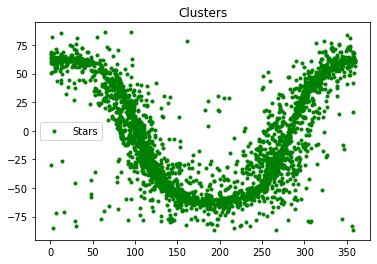

In [14]:
RAs = data['RA']
DECs = data['DEC']
Classes = data['CLASS']
Dis = data['DISTANCE']

plt.figure()
plt.title('Clusters')
plt.plot(RAs,DECs,'g.', label = 'Stars')
plt.legend()
plt.show()
#if (Classes == 'OPEN STAR CLUSTER'):
#    plt.plot('b')
#else: 
#    plt.plot ('r')
#I don't know how to color code these data points, above is what I tried :3


In [7]:
print(Classes)

                       CLASS                        
----------------------------------------------------
                                  OPEN STAR CLUSTER

                                  OPEN STAR CLUSTER

                                  OPEN STAR CLUSTER

                                  OPEN STAR CLUSTER

                                  OPEN STAR CLUSTER

                                  OPEN STAR CLUSTER

                                  OPEN STAR CLUSTER

                                  OPEN STAR CLUSTER

                                  OPEN STAR CLUSTER

GLOBULAR CLUSTER EXTENDED GALACTIC OR EXTRAGALACTIC

                                                 ...
                                  OPEN STAR CLUSTER

                                  OPEN STAR CLUSTER

                                  OPEN STAR CLUSTER

                                  OPEN STAR CLUSTER

                                  OPEN STAR CLUSTER

                                  OPEN STAR CL

In [12]:
icrs = SkyCoord(ra=RAs*u.deg,dec=DECs*u.deg)
# IDK what happened here, I tried a lot of things but I still got this error
# On the class recording, when Yilun did it, it worked fine lol 😔

TypeError: unsupported operand type(s) for *: 'Column' and 'Unit'

In [13]:
GALA = icrs.transform_to('galactic')
GALA
plt.scatter(GALA.l, GALA.b, label = 'Star Clusters')
plt.legend
plt.show()

NameError: name 'icrs' is not defined

(DOUBLE CLICK HERE TO ANSWER QUESTION 6):

YOUR ANSWER: I don't know, but based off the lecture, I think the band became 
straight because the plot is transformed and thus our perspective too. 

# Pandas (40 Points)

One of the most efficient and easy to use libraries for importing data files. We will explore the basics here.

Let's import some data that represents the position of a ball being thrown off the roof of Campbell Hall. Using some basic kinematics we can derive the following equation.

$$y(t) = -\frac{1}{2} g t^2 + v_{0,y} t + y_0$$

For this problem we need to import our position measurements from our fellow colleagues in our research group.

<img src='diagram.jpeg' width="600" height="400"> 

## Problem 5 (5 Points)

Your job for this problem is to simply read in the file named **"projectile.csv"** using the pandas library (DONT USE `numpy`). Print out your DataFrame so we can see what the data looks like as a table.

In [14]:
Data_frame1 = pd.read_csv("projectile.csv")
print (Data_frame1)

    Unnamed: 0   Time[s]  Position[m]
0            0  0.000000    95.000000
1            1  0.097959    96.128490
2            2  0.195918   102.162939
3            3  0.293878   103.103347
4            4  0.391837   102.949714
5            5  0.489796   102.702041
6            6  0.587755   109.360326
7            7  0.685714   101.924571
8            8  0.783673   106.394775
9            9  0.881633   108.770939
10          10  0.979592   106.053061
11          11  1.077551   107.241143
12          12  1.175510   104.335184
13          13  1.273469   106.335184
14          14  1.371429   107.241143
15          15  1.469388   105.053061
16          16  1.567347   102.770939
17          17  1.665306   102.394775
18          18  1.763265   105.924571
19          19  1.861224   109.360326
20          20  1.959184   102.702041
21          21  2.057143   104.949714
22          22  2.155102   100.103347
23          23  2.253061   106.162939
24          24  2.351020    97.128490
25          

## Problem 6 (5 Points)

Now load your DataFrame columns into numpy arrays and make a plot of Position vs. Time.

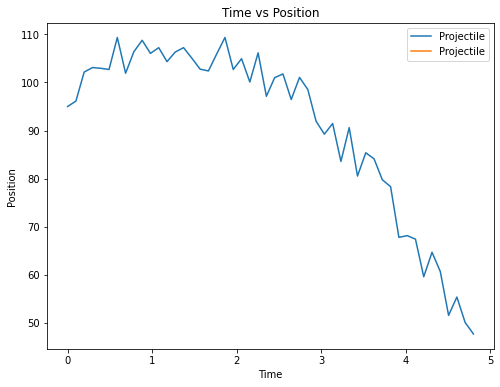

In [15]:
time = Data_frame1['Time[s]'].to_numpy()
position = Data_frame1['Position[m]'].to_numpy()

plt.figure(figsize=(8,6))
plt.plot(time, position, 100, label = 'Projectile')
plt.title('Time vs Position')
plt.xlabel('Time')
plt.ylabel('Position')
plt.legend()
plt.show()

## Problem 7 (10 Points)

In the last problem set we learned how to curve fit a quadratic equation. The above equation is also a quadratic equation with respect to time. Use what we learned last week to fit a curve to the noisy data from our fellow researchers. Explicitly print out what the initial velocity $v_{0,y}$ and initial height $y_0$ are based on your curve fit along with their respective errors. 

In [16]:
from scipy.optimize import fsolve
g = con.G
def y(t): 
    return -1/2*g*t**2+1*t+95

T = np.linspace(0,10,100)
plt.plot(T, y(T), label = 'Y(t)')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.legend()
plt.show()

roots = fsolve(y, [1.6843, 4.87397]) 
root1 = roots[0]
root2 = roots[1]

 
print (roots)
# I'm not sure what wrong in this case, I don't understand what the error means


UnitConversionError: Can only apply 'add' function to dimensionless quantities when other argument is not a quantity (unless the latter is all zero/infinity/nan)

## Problem 8 (10 Points)

Alright now we have a model function that can fit the function as a function of time. create two lists/arrays of values using this function. One list's values should be time where we use `t = np.linspace(0,5,100)` to create the values and the other list should be your model's output after taking in all those times. (A list of the values you would normally plot)

Once you have created your two lists of values, construct a pandas DataFrame using these lists. Your data frame should have two columns with 100 values each. 

In [ ]:
t = np.linspace(0,5,100)
Data_frame2 = Data_frame1.append(t)

## Problem 9 (10 Points)

Last part of the problem set! This is basically one line of code. Export your new DataFrame to a csv file called **"trajectory.csv"**, this will be useful for your colleagues!

In [17]:
df = pd.Data_Frame2(Data_frame1)
df.to_csv('trajectory.csv') 
# i tried my best here but I was not sure how to complete this 
# problem, but I ran out of time, if given more time, 
# I would've fixed my issue with the color coding and also why my 
# code for probelm 7 and 8 don't work

AttributeError: module 'pandas' has no attribute 'Data_Frame2'

In [8]:
fit_file = tarfile.open('PanSTARR.txz')
Data = Table.read(fit_file)
Data 

NameError: name 'tarfile' is not defined